In [143]:
#install.packages("klaR",dependencies=TRUE)

In [144]:
#install.packages("AlgDesign",dependencies=TRUE)

In [145]:
#install.packages("agricolae",dependencies=TRUE)

In [146]:
#install.packages("multcomp",dependencies=TRUE)

In [147]:
library(multcomp)
library(agricolae)
library(repr)
library(RColorBrewer)

In [148]:
setwd("~/Documents/UCDavis/dib/MMETSP")

In [149]:
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
tax_raw <- read.csv("assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")
dim(tax_raw)

[1] 719 289

In [150]:
# remove MMETSP with multiple SRA, aka "special flowers"
tax_raw <- tax_raw[!tax_raw$SampleName %in% special_flowers,]
dim(tax_raw)
# restrict to Unique_kmers, Phylum, n_seqs, Input.Reads, mean_orf_percent.x
phylum_data <-tax_raw[,c(2,34,41,45,54,266,271,283)]
phylum <- phylum_data$Phylum
# Restrict data to top 7 most common Phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
sub<-phylum_data[phylum_data$Phylum %in% sub_phy,]
#colors=rainbow(9)
#colors=c('#8c510a','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e')
colors = palette(brewer.pal(n=8,name="Dark2"))

[1] 660 289

## Size of dataset

In [151]:
head(sub)
dim(sub)

,SampleName,Phylum,Input.Reads,n_seqs,mean_orf_percent,DIB.Complete_eukaryotic_BUSCO_perc,DIB.Complete_protist_BUSCO_prop,dib_assembly_unique_kmers
1,MMETSP0004,Ochrophyta,24803955,33559,81.26381,69.30693,0.7179487,19837761
2,MMETSP0005,Ochrophyta,28100060,32824,80.15649,67.32673,0.6880342,20350054
3,MMETSP0006,Haptophyta,21466210,47463,80.79508,55.77558,0.6452991,25286098
4,MMETSP0007,Haptophyta,20174360,30922,71.01950,30.36304,0.3974359,12496793
7,MMETSP0009,Bacillariophyta,15820915,54275,80.37076,46.53465,0.4743590,30074483
8,MMETSP0010,Bacillariophyta,11591751,43375,67.98617,73.59736,0.7521368,24840436


[1] 530   8

In [152]:
summary(sub$Phylum)
class(sub$Phylum)

Alveolata        Apicomplexa         Ascomycota    Bacillariophyta 
                 0                  0                  0                173 
       Bicosoecida           Cercozoa Chlorarachniophyta        Chlorophyta 
                 0                  0                  0                 62 
        Ciliophora        Cryptophyta          Dinophyta         Euglenozoa 
                25                 22                114                  0 
      Foraminifera        Forminafera        Glaucophyta         Haptophyta 
                 0                  0                  0                 61 
     Labyrinthista         Ochrophyta        Perkinsozoa    Pyrrophycophyta 
                 0                 73                  0                  0 
        Rhodophyta  Sarcomastigophora            Unknown 
                 0                  0                  0

[1] "factor"

### Make category for "Others"

In [153]:
phylum_data$sub_Phylum <- ifelse(phylum_data$Phylum %in% sub_phy, as.character(phylum_data$Phylum),"Others")
head(phylum_data)
dim(phylum_data)
phylum_data$sub_Phylum <- as.factor(phylum_data$sub_Phylum)
class(phylum_data$sub_Phylum)

,SampleName,Phylum,Input.Reads,n_seqs,mean_orf_percent,DIB.Complete_eukaryotic_BUSCO_perc,DIB.Complete_protist_BUSCO_prop,dib_assembly_unique_kmers,sub_Phylum
1,MMETSP0004,Ochrophyta,24803955,33559,81.26381,69.30693,0.7179487,19837761,Ochrophyta
2,MMETSP0005,Ochrophyta,28100060,32824,80.15649,67.32673,0.6880342,20350054,Ochrophyta
3,MMETSP0006,Haptophyta,21466210,47463,80.79508,55.77558,0.6452991,25286098,Haptophyta
4,MMETSP0007,Haptophyta,20174360,30922,71.01950,30.36304,0.3974359,12496793,Haptophyta
7,MMETSP0009,Bacillariophyta,15820915,54275,80.37076,46.53465,0.4743590,30074483,Bacillariophyta
8,MMETSP0010,Bacillariophyta,11591751,43375,67.98617,73.59736,0.7521368,24840436,Bacillariophyta


[1] 660   9

[1] "factor"

In [154]:
summary(phylum_data$sub_Phylum)
colnames(phylum_data)
length(colnames(phylum_data))

Bacillariophyta     Chlorophyta      Ciliophora     Cryptophyta       Dinophyta 
            173              62              25              22             114 
     Haptophyta      Ochrophyta          Others 
             61              73             130

[1] "SampleName"                         "Phylum"                            
[3] "Input.Reads"                        "n_seqs"                            
[5] "mean_orf_percent"                   "DIB.Complete_eukaryotic_BUSCO_perc"
[7] "DIB.Complete_protist_BUSCO_prop"    "dib_assembly_unique_kmers"         
[9] "sub_Phylum"

[1] 9

In [155]:
phylum_data <- phylum_data[,c(1,3:9)]
phylum_data$Phylum <- phylum_data$sub_Phylum

In [156]:
sub <- phylum_data

## Mean %ORF

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = mean_orf_percent ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  -0.9613     1.1791  -0.815  0.99132    
Ciliophora - Bacillariophyta == 0  -20.7047     1.6943 -12.220  < 0.001 ***
Cryptophyta - Bacillariophyta == 0   6.1667     1.7923   3.441  0.01281 *  
Dinophyta - Bacillariophyta == 0    10.8851     0.9604  11.334  < 0.001 ***
Haptophyta - Bacillariophyta == 0    4.8356     1.1791   4.101  0.00104 ** 
Ochrophyta - Bacillariophyta == 0    3.0753     1.1052   2.783  0.09275 .  
Others - Bacillariophyta == 0        1.0432     0.9274   1.125  0.94635    
Ciliophora - Chlorophyta == 0      -19.7433     1.8804 -10.499  < 0.001 ***
Cryptophyta - Chlorophyta == 0       7.1280     1.9693   3.620  0.00696 ** 
Dinophyta - Chlorophyta == 0        11.8464     1.2601   9.4

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

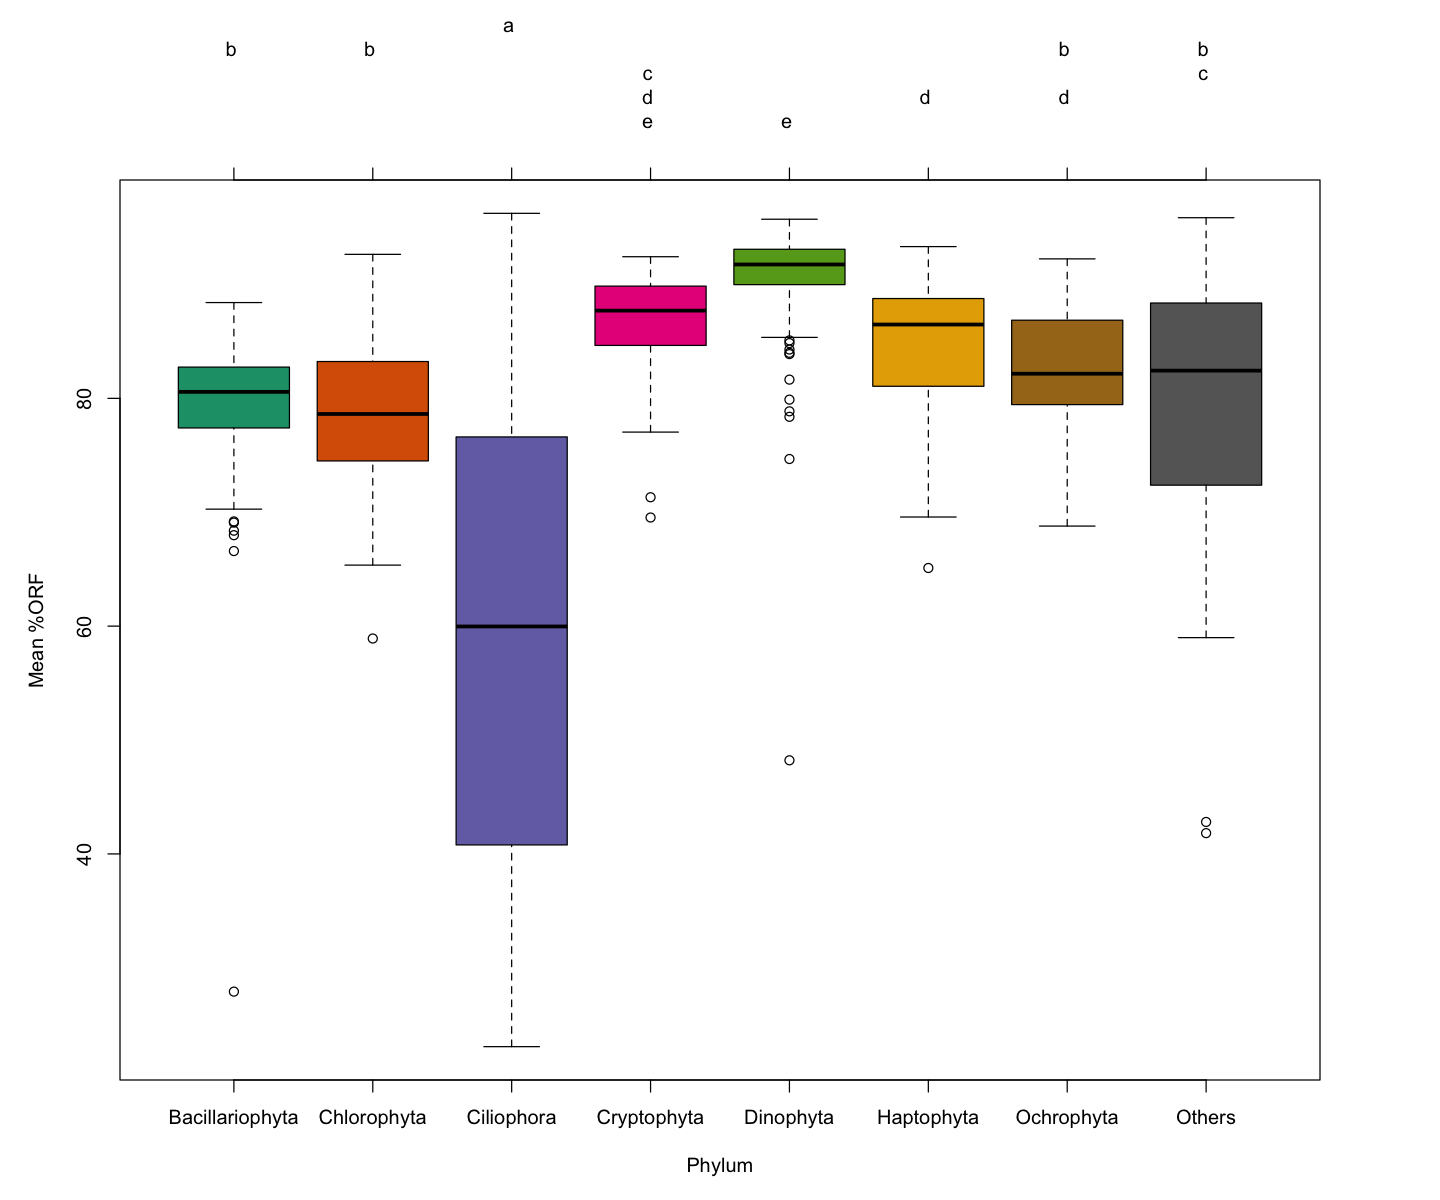

In [157]:
fit <- aov(mean_orf_percent ~ Phylum,data=sub)
a<-HSD.test(fit,"Phylum",group=TRUE)
tuk<-glht(fit,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.a<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_unique_kmers.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_unique_kmers.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")
dev.off()
plot(tuk.cld.a,col=colors,ylab="Mean %ORF")

# Unique k-mers

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = dib_assembly_unique_kmers ~ Phylum, data = sub)

Linear Hypotheses:
                                    Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  -5846568    2414049  -2.422  0.21653    
Ciliophora - Bacillariophyta == 0    5771166    3489560   1.654  0.69884    
Cryptophyta - Bacillariophyta == 0   9239934    3691595   2.503  0.18174    
Dinophyta - Bacillariophyta == 0    32874643    1967418  16.710  < 0.001 ***
Haptophyta - Bacillariophyta == 0     932989    2428572   0.384  0.99993    
Ochrophyta - Bacillariophyta == 0   -3790902    2276220  -1.665  0.69075    
Others - Bacillariophyta == 0       -1919394    1893031  -1.014  0.96925    
Ciliophora - Chlorophyta == 0       11617735    3863891   3.007  0.04968 *  
Cryptophyta - Chlorophyta == 0      15086503    4047283   3.728  0.00457 ** 
Dinophyta - Chlorophyta == 0        38721

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

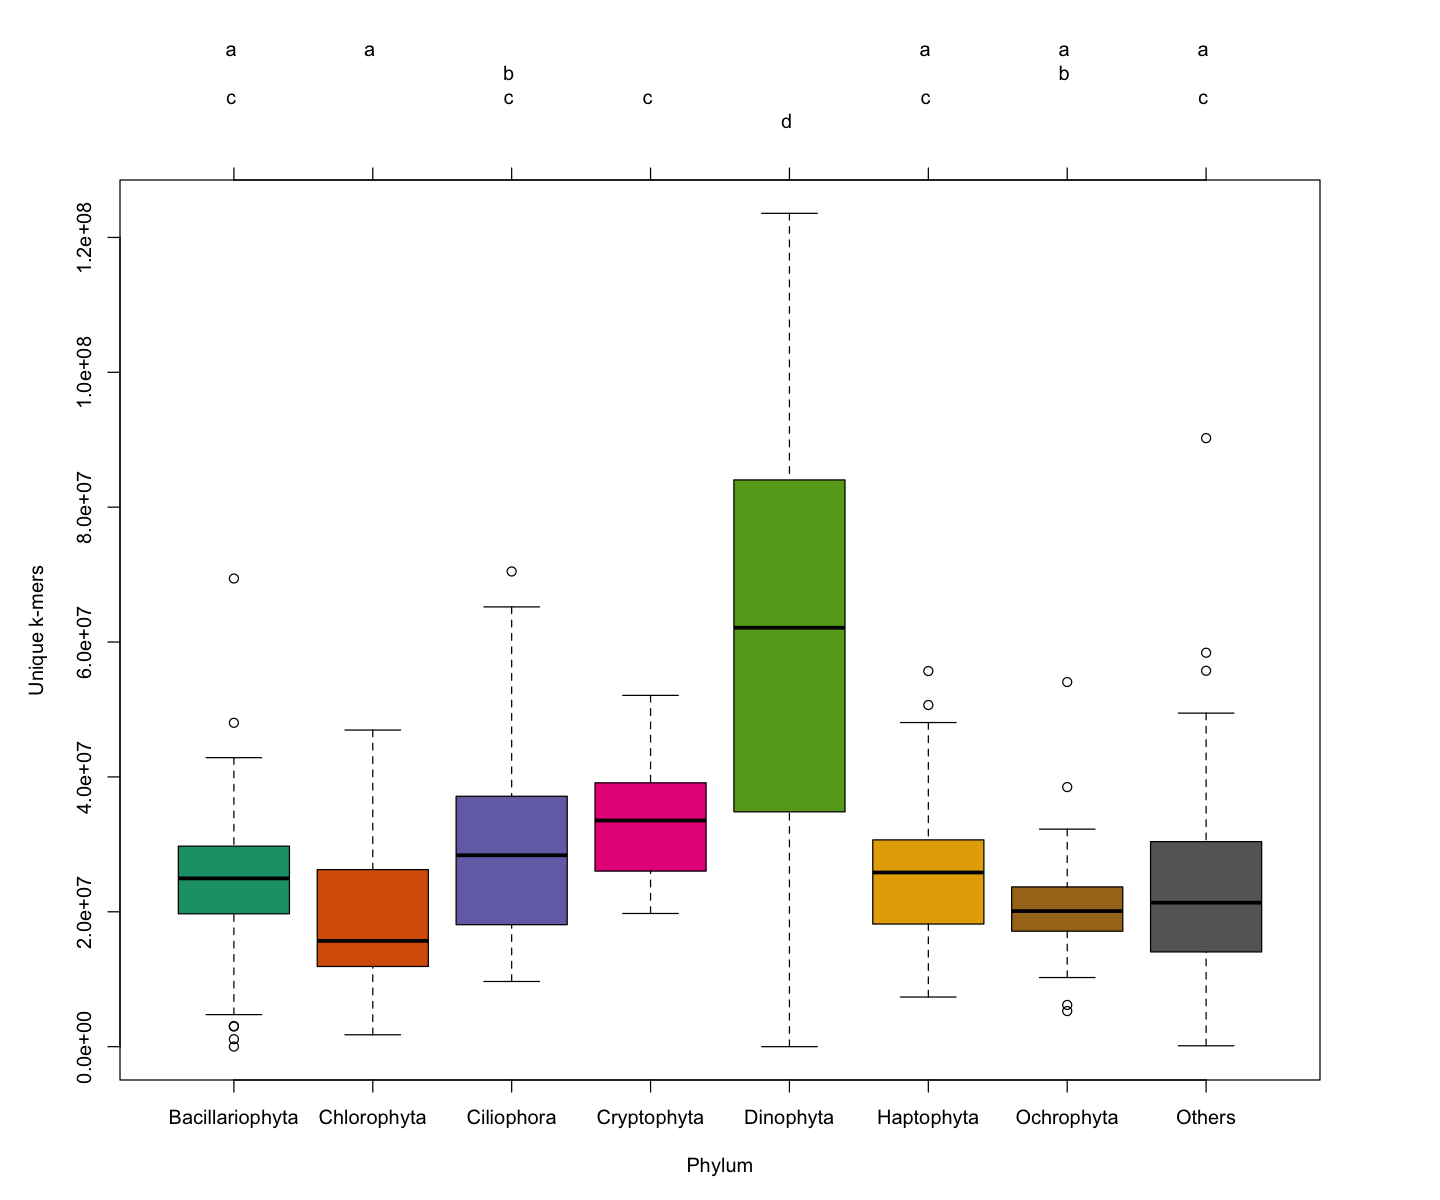

In [158]:
fit2 <- aov(dib_assembly_unique_kmers ~ Phylum,data=sub)
b<-TukeyHSD(fit2,"Phylum",conf.level=0.95)
tuk<-glht(fit2,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.b<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_mean_orf.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_mean_org.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.b,col=colors)
dev.off()
plot(tuk.cld.b,col=colors, ylab="Unique k-mers")

# Number of Input reads

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = Input.Reads ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)   
Chlorophyta - Bacillariophyta == 0  -282548    1074536  -0.263  1.00000   
Ciliophora - Bacillariophyta == 0   3976394    1543975   2.575  0.15420   
Cryptophyta - Bacillariophyta == 0  3439725    1633367   2.106  0.39070   
Dinophyta - Bacillariophyta == 0    1413547     870495   1.624  0.71791   
Haptophyta - Bacillariophyta == 0  -2160043    1074536  -2.010  0.45367   
Ochrophyta - Bacillariophyta == 0  -2100984    1007126  -2.086  0.40384   
Others - Bacillariophyta == 0        -24662     837582  -0.029  1.00000   
Ciliophora - Chlorophyta == 0       4258942    1713622   2.485  0.18882   
Cryptophyta - Chlorophyta == 0      3722273    1794583   2.074  0.41133   
Dinophyta - Chlorophyta == 0        1696095    1144728   1.482  0.80309   


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

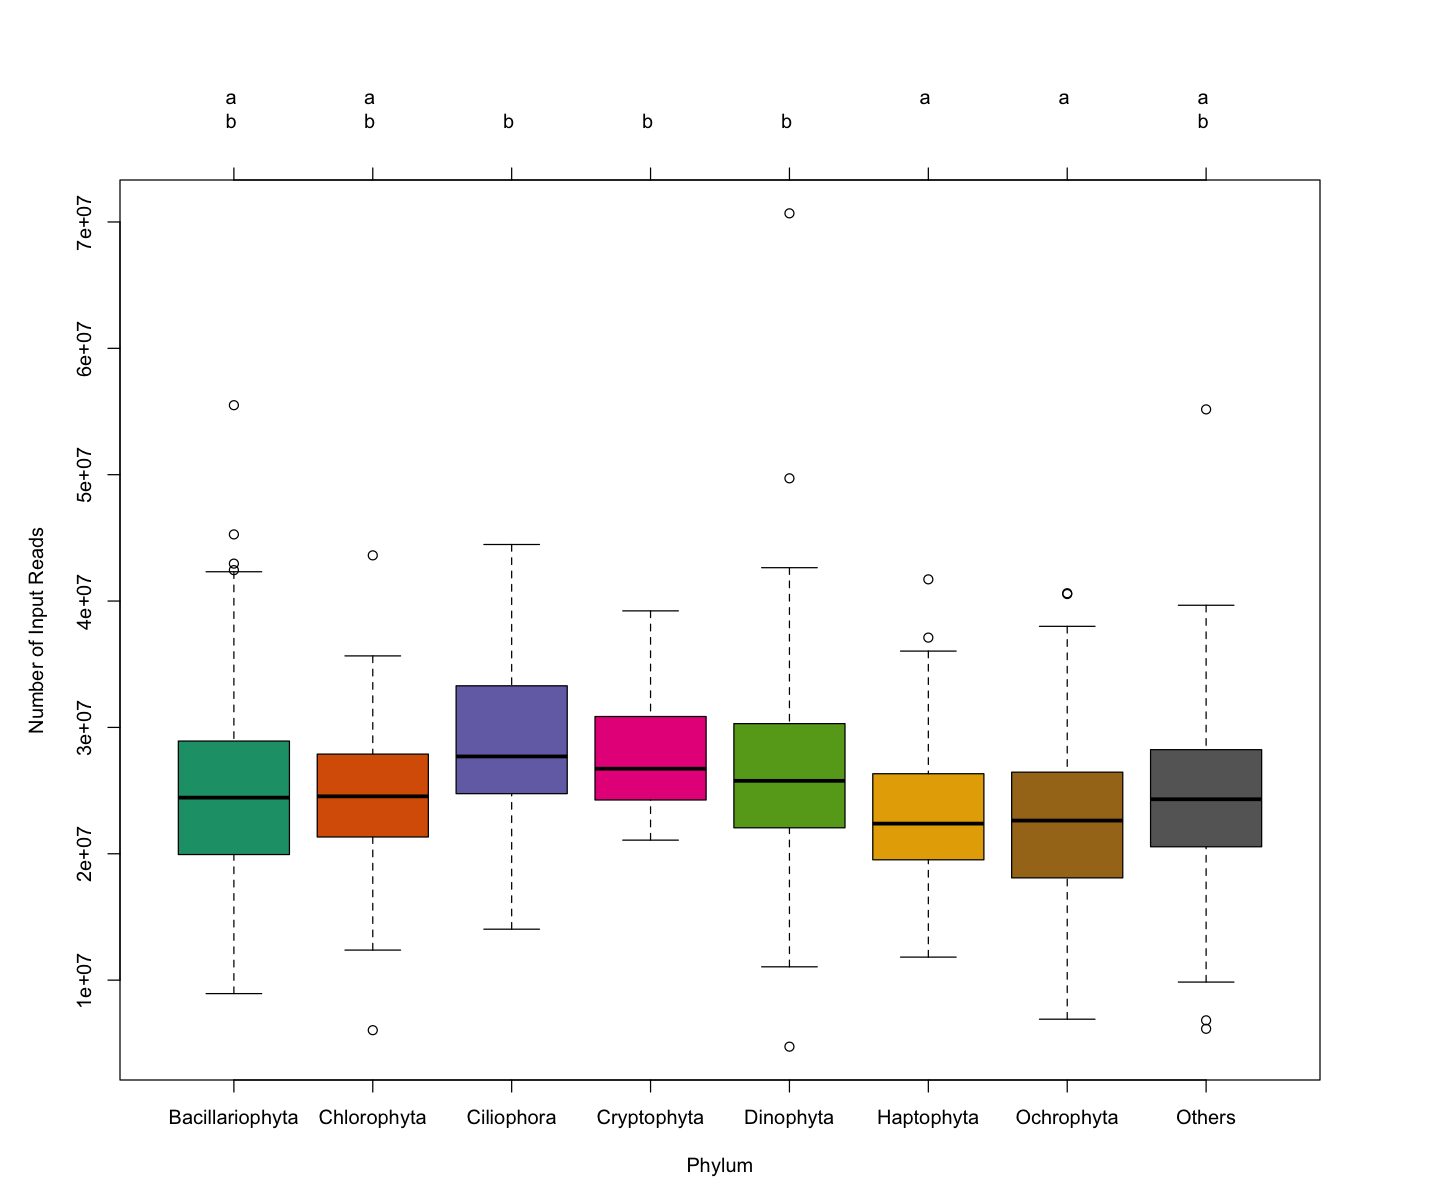

In [159]:
fit3 <- aov(Input.Reads ~ Phylum,data=sub)
b<-TukeyHSD(fit3,"Phylum",conf.level=0.95)
tuk<-glht(fit3,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.c<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_input_Reads.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_input_Reads.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.c,col=colors)
dev.off()
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads")

# Number of contigs

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = n_seqs ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0 -10604.3     3945.4  -2.688  0.11797    
Ciliophora - Bacillariophyta == 0   15625.9     5669.0   2.756  0.09929 .  
Cryptophyta - Bacillariophyta == 0  25057.4     5997.3   4.178  < 0.001 ***
Dinophyta - Bacillariophyta == 0    63580.8     3213.4  19.786  < 0.001 ***
Haptophyta - Bacillariophyta == 0    9305.3     3945.4   2.359  0.24658    
Ochrophyta - Bacillariophyta == 0     228.8     3697.9   0.062  1.00000    
Others - Bacillariophyta == 0        3049.0     3103.1   0.983  0.97426    
Ciliophora - Chlorophyta == 0       26230.2     6291.9   4.169  < 0.001 ***
Cryptophyta - Chlorophyta == 0      35661.7     6589.2   5.412  < 0.001 ***
Dinophyta - Chlorophyta == 0        74185.1     4216.2  17.595  < 0.00

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

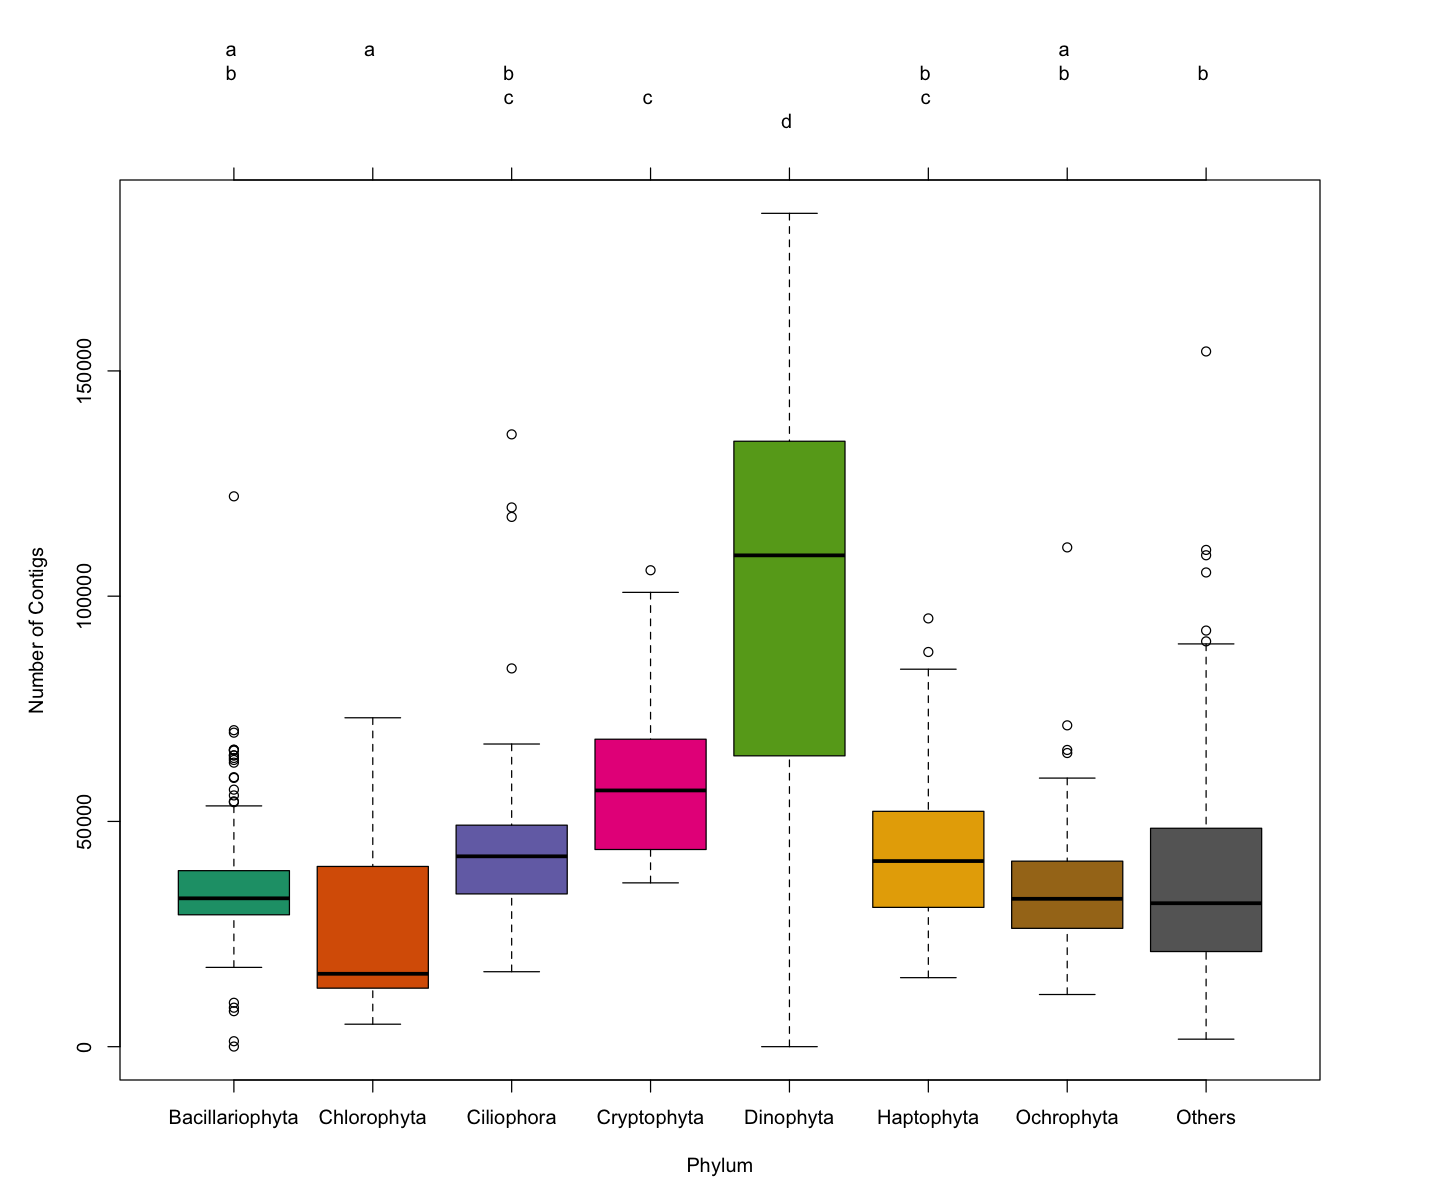

In [160]:
fit4 <- aov(n_seqs ~ Phylum,data=sub)
b<-TukeyHSD(fit4,"Phylum",conf.level=0.95)
tuk<-glht(fit4,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.d<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_n_contigs.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_n_contigs.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.d,col=colors)
dev.off()
plot(tuk.cld.d,col=colors, ylab="Number of Contigs")

# BUSCO

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = DIB.Complete_eukaryotic_BUSCO_perc ~ Phylum, data = sub)

Linear Hypotheses:
                                   Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  12.4198     2.6611   4.667   <0.001 ***
Ciliophora - Bacillariophyta == 0    0.7864     3.8466   0.204   1.0000    
Cryptophyta - Bacillariophyta == 0   2.6262     4.0693   0.645   0.9980    
Dinophyta - Bacillariophyta == 0    -4.6902     2.1804  -2.151   0.3621    
Haptophyta - Bacillariophyta == 0   -4.8008     2.6771  -1.793   0.6044    
Ochrophyta - Bacillariophyta == 0   -3.6362     2.5091  -1.449   0.8207    
Others - Bacillariophyta == 0        4.2787     2.0867   2.050   0.4269    
Ciliophora - Chlorophyta == 0      -11.6333     4.2593  -2.731   0.1051    
Cryptophyta - Chlorophyta == 0      -9.7936     4.4614  -2.195   0.3350    
Dinophyta - Chlorophyta == 0       -17.110

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

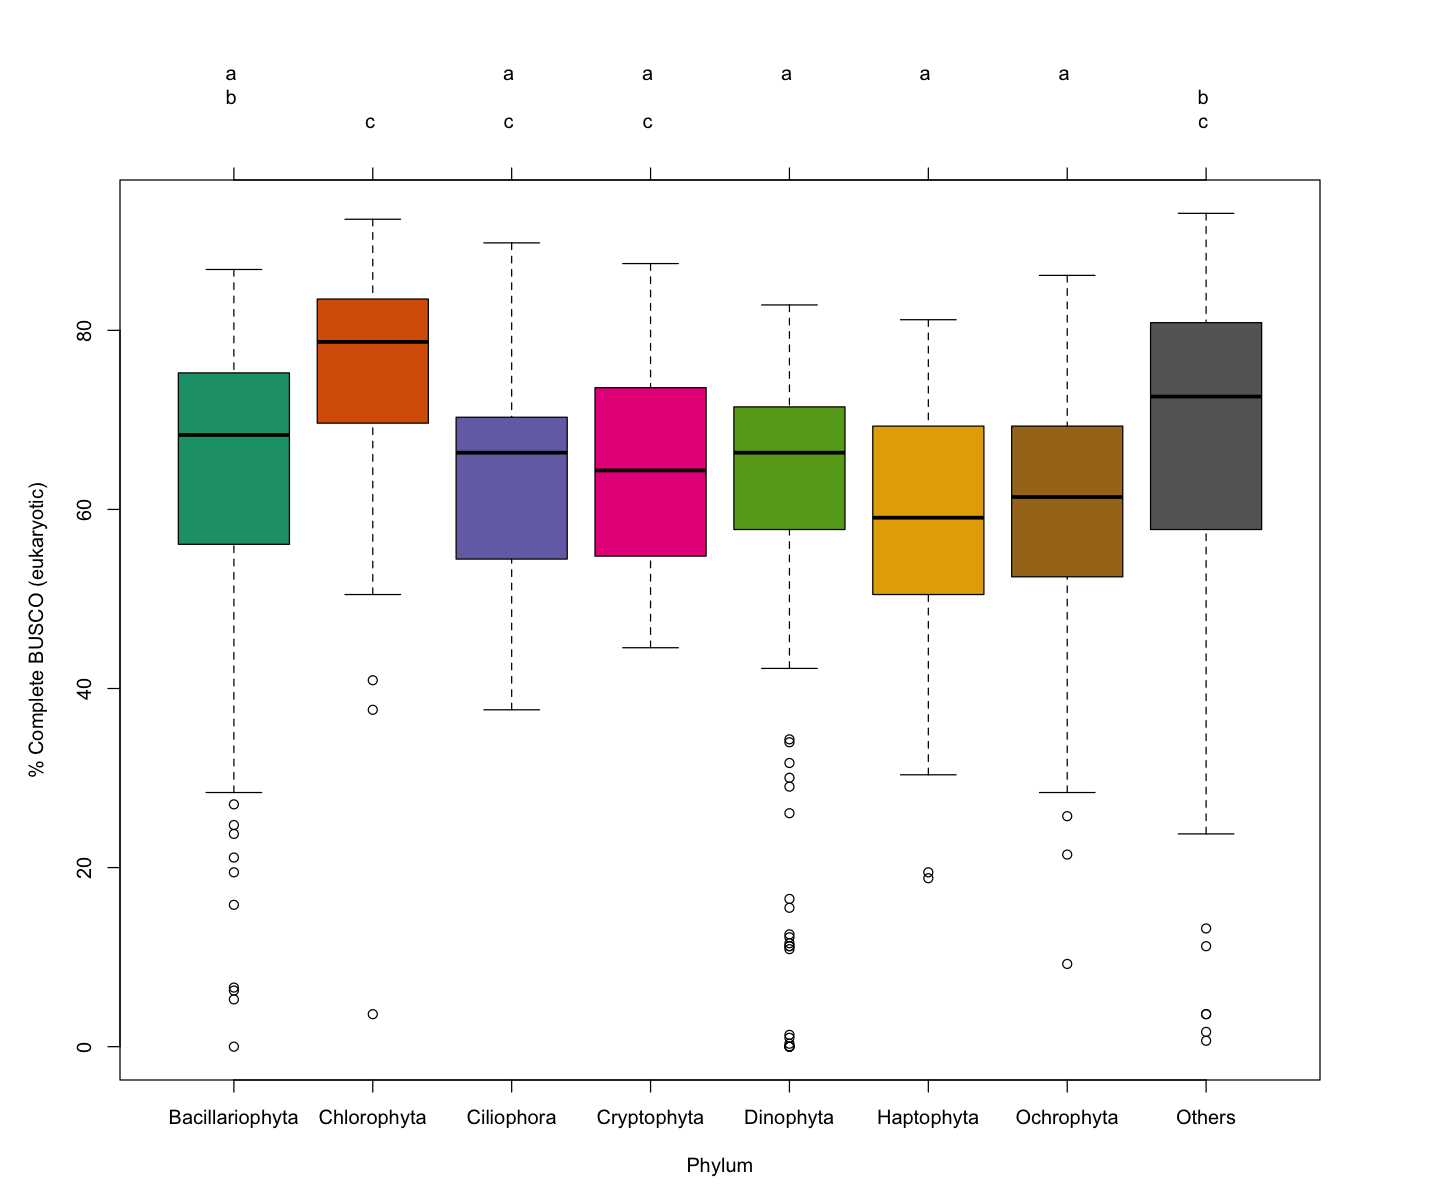

In [161]:
fit5 <- aov(DIB.Complete_eukaryotic_BUSCO_perc ~ Phylum,data=sub)
b<-TukeyHSD(fit5,"Phylum",conf.level=0.95)
tuk<-glht(fit5,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.e<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_BUSCO.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_BUSCO.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.e,col=colors)
dev.off()
plot(tuk.cld.e,col=colors, ylab="% Complete BUSCO (eukaryotic)")

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = DIB.Complete_protist_BUSCO_prop ~ Phylum, data = sub)

Linear Hypotheses:
                                    Estimate Std. Error t value Pr(>|t|)    
Chlorophyta - Bacillariophyta == 0  0.066156   0.026500   2.496   0.1839    
Ciliophora - Bacillariophyta == 0  -0.006772   0.038306  -0.177   1.0000    
Cryptophyta - Bacillariophyta == 0 -0.035475   0.040524  -0.875   0.9867    
Dinophyta - Bacillariophyta == 0   -0.025735   0.021713  -1.185   0.9298    
Haptophyta - Bacillariophyta == 0  -0.068555   0.026659  -2.572   0.1557    
Ochrophyta - Bacillariophyta == 0  -0.039429   0.024987  -1.578   0.7468    
Others - Bacillariophyta == 0      -0.008659   0.020780  -0.417   0.9999    
Ciliophora - Chlorophyta == 0      -0.072928   0.042415  -1.719   0.6550    
Cryptophyta - Chlorophyta == 0     -0.101630   0.044428  -2.288   0.2831    
Dinophyta - Chlorophyta == 0       

Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”

pdf 
  2

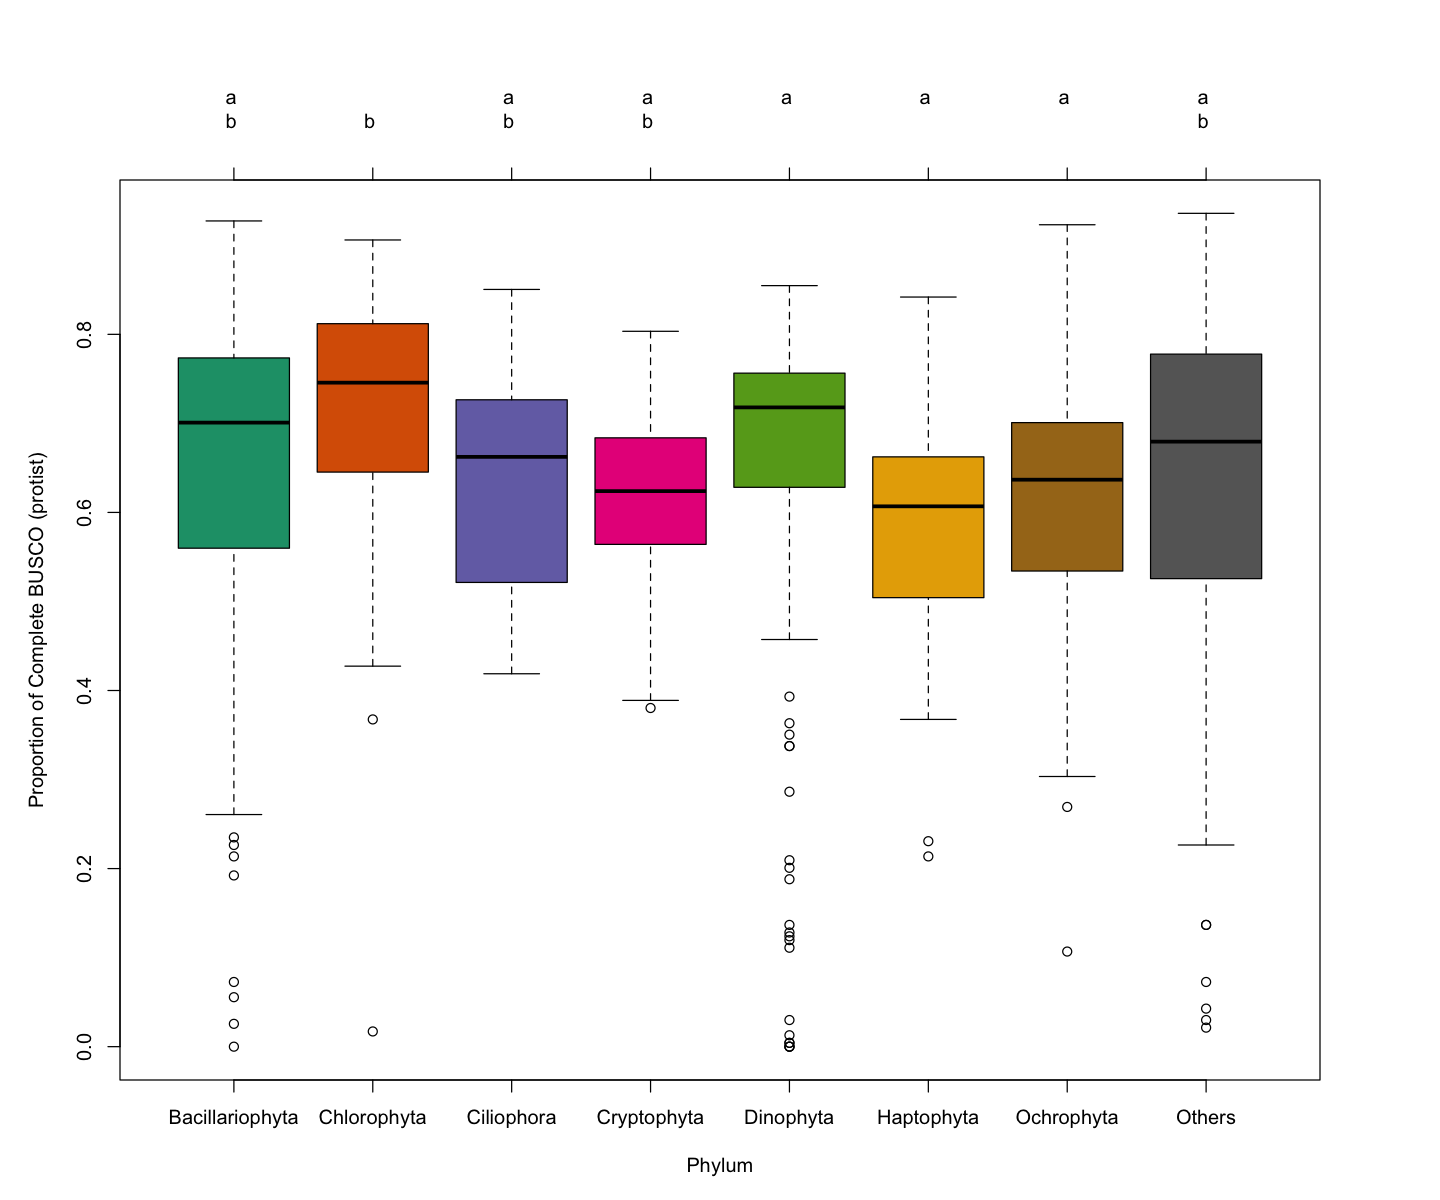

In [162]:
fit6 <- aov(DIB.Complete_protist_BUSCO_prop ~ Phylum,data=sub)
b<-TukeyHSD(fit6,"Phylum",conf.level=0.95)
tuk<-glht(fit6,linfct=mcp(Phylum="Tukey"))
summary(tuk)
tuk.cld.f<-cld(tuk)
opar<-par(mai=c(1,1,1.5,1))
options(repr.plot.width=12, repr.plot.height=10)
pdf("paper/Figure8_tukey_taxa_BUSCO_protist.pdf",width=11,height=8.5)
png("paper/Figure8_tukey_taxa_BUSCO_protist.png",width=11,height=8.5,units="in",res=1200)
plot(tuk.cld.f,col=colors)
dev.off()
plot(tuk.cld.f,col=colors, ylab="Proportion of Complete BUSCO (protist)")

pdf 
  2

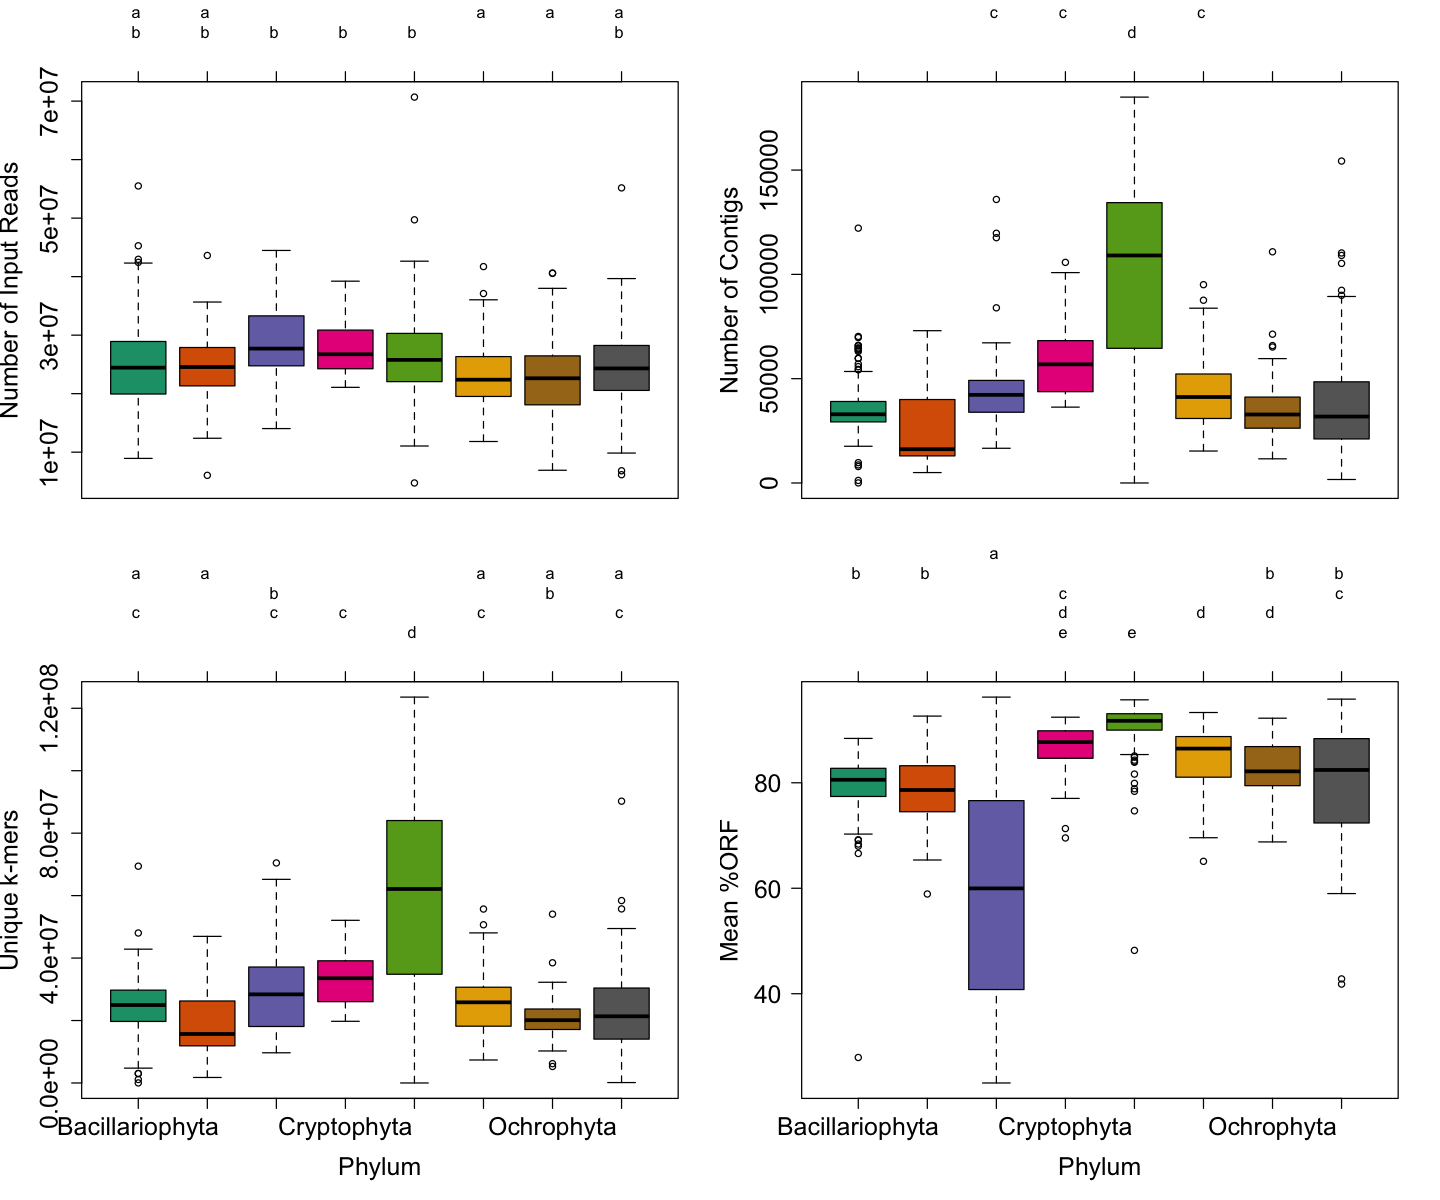

In [163]:
par(mfrow=c(2,2))
pdf("paper/Figure8_all.pdf", width=8.5, height=11)
png("paper/Figure8_all.png", width=8.5, height=11,unit='in',res=1200)
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads",xaxt='n',cex.lab=1.5,cex.axis=1.5)
plot(tuk.cld.d,col=colors, ylab="Number of Contigs",xaxt='n',cex.lab=1.5,cex.axis=1.5)
plot(tuk.cld.b,col=colors, ylab="Unique k-mers",cex.lab=1.5,cex.axis=1.5)
plot(tuk.cld.a,col=colors,ylab="Mean %ORF",cex.lab=1.5,cex.axis=1.5)
dev.off()
plot(tuk.cld.c,col=colors, ylab="Number of Input Reads",xlab="",xaxt='n',cex.lab=1.5,cex.axis=1.5)
plot(tuk.cld.d,col=colors, ylab="Number of Contigs",xlab="",xaxt='n',cex.lab=1.5,cex.axis=1.5)
plot(tuk.cld.b,col=colors, ylab="Unique k-mers",cex.lab=1.5,cex.axis=1.5,srt=45)
plot(tuk.cld.a,col=colors,ylab="Mean %ORF",cex.lab=1.5,cex.axis=1.5,las=1)